In [91]:
# import các thư viện
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [92]:
# Đọc bộ dữ liệu
df = pd.read_excel('D:\Desktop\Data_Analyst\Jupiter_Notebook_Pandas\Bài tập house price\house_price_dống-da.xlsx')
df.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


#### Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

In [94]:
df.isna().sum()

title                  0
address                0
area                   6
price                 56
postDate               0
land_certificate     307
house_direction      956
balcony_direction    976
toilet               449
bedroom              365
floor                624
type_of_land           0
street_name          192
ward_name            198
district_name          0
city_name              0
lat                    0
long                   0
dtype: int64

#### Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá 

In [95]:
df.dropna(subset=['price'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              944 non-null    object        
 1   address            944 non-null    object        
 2   area               942 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           944 non-null    datetime64[ns]
 5   land_certificate   683 non-null    object        
 6   house_direction    43 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             548 non-null    float64       
 9   bedroom            631 non-null    float64       
 10  floor              367 non-null    float64       
 11  type_of_land       944 non-null    object        
 12  street_name        791 non-null    object        
 13  ward_name          788 non-null    object        
 14  district_n

#### Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”, house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó,

In [96]:
df['land_certificate'] = df['land_certificate'].fillna(value='không có thông tin')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              944 non-null    object        
 1   address            944 non-null    object        
 2   area               942 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           944 non-null    datetime64[ns]
 5   land_certificate   944 non-null    object        
 6   house_direction    43 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             548 non-null    float64       
 9   bedroom            631 non-null    float64       
 10  floor              367 non-null    float64       
 11  type_of_land       944 non-null    object        
 12  street_name        791 non-null    object        
 13  ward_name          788 non-null    object        
 14  district_n

In [97]:
df[df['land_certificate'] == 'không có thông tin']

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
9,"7 tầng thang máy gara ở vip 41m2, MT 4.6m ở vi...","Đường Hồ Đắc Di, Phường Nam Đồng, Đống Đa, Hà...",41.0,8900.0,2021-04-06,không có thông tin,Đông-Nam,NaN,NaN,3.0,7.0,Bán nhà riêng\n,Đường Hồ Đắc Di,Phường Nam Đồng,Quận Đống Đa,Thành phố Hà Nội,21.012310,105.828978
94,BÁN NHÀ PHỐ CHỢ KHÂM THIÊN_ĐỐNG ĐA_33M2x4T_TẶN...,Hà Nội\nQuận Đống Đa,33.0,3100.0,2021-01-01,không có thông tin,NaN,NaN,NaN,NaN,NaN,Bán nhà riêng,NaN,NaN,Quận Đống Đa,Thành phố Hà Nội,21.018072,105.829949
95,"Bán nhà mặt phố Thịnh Quang 56m2, Mặt Tiền 4m,...",Hà Nội\nQuận Đống Đa,56.0,10000.0,2021-01-01,không có thông tin,NaN,NaN,NaN,NaN,NaN,Bán nhà mặt phố,NaN,NaN,Quận Đống Đa,Thành phố Hà Nội,21.018072,105.829949
96,"Bán nhà mặt đường láng, số nhà 468 đường Láng ...",Hà Nội\nQuận Đống Đa,59.0,50000.0,2021-01-01,không có thông tin,NaN,NaN,NaN,NaN,NaN,Bán nhà mặt phố,NaN,NaN,Quận Đống Đa,Thành phố Hà Nội,21.018072,105.829949
97,"Bán 51,5m2 x 3tầng cũ gần rạp phim quốc gia",Hà Nội\nQuận Đống Đa,51.0,6100.0,2021-01-01,không có thông tin,NaN,NaN,NaN,NaN,NaN,Bán nhà riêng,NaN,NaN,Quận Đống Đa,Thành phố Hà Nội,21.018072,105.829949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,"Mặt phố kinh doanh sầm uất Nguyẽn Van Tuyét,...","Đường Nguyễn Văn Tuyết, Phường Trung Liệt, Đố...",76.0,30500.0,2021-01-01,không có thông tin,NaN,NaN,NaN,NaN,NaN,Bán nhà mặt phố\n,Đường Nguyễn Văn Tuyết,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009533,105.820193
993,BÁN GẤP LÔ ĐẤT KINH DOANH ĐỈNH PHỐ TÔN THẤT TÙ...,"Đường Tôn Thất Tùng, Phường Phương Mai, Đống Đ...",168.0,23500.0,2021-05-09,không có thông tin,NaN,NaN,3.0,3.0,3.0,Bán nhà mặt phố\n,Đường Tôn Thất Tùng,Phường Phương Mai,Quận Đống Đa,Thành phố Hà Nội,21.000823,105.829097
994,"Bán nhà riêng chính chủ ngõ 29 Vũ Thạnh, Đống ...","Đường Vũ Thạnh, Phường Ô Chợ Dừa, Đống Đa,...",25.0,2850.0,2021-05-09,không có thông tin,NaN,NaN,3.0,2.0,4.0,Bán nhà riêng\n,Đường Ô Chợ Dừa,Phường Ô Chợ Dừa,Quận Đống Đa,Thành phố Hà Nội,21.026821,105.825845
996,"Bán nhà 5 tầng đep MP Yên Lãng giá rẻ, DT 60m2...","Đường Yên Lãng, Phường Trung Liệt, Đống Đa, ...",60.0,17500.0,2021-01-01,không có thông tin,NaN,NaN,NaN,NaN,NaN,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.011495,105.816666


In [98]:
df['house_direction'] = df['house_direction'].fillna(df['house_direction'].mode()[0])
df['balcony_direction'] = df['balcony_direction'].fillna(df['balcony_direction'].mode()[0])
df['toilet'] = df['toilet'].fillna(df['toilet'].mode()[0])
df['bedroom'] = df['bedroom'].fillna(df['bedroom'].mode()[0])
df['floor'] = df['floor'].fillna(df['floor'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              944 non-null    object        
 1   address            944 non-null    object        
 2   area               942 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           944 non-null    datetime64[ns]
 5   land_certificate   944 non-null    object        
 6   house_direction    944 non-null    object        
 7   balcony_direction  944 non-null    object        
 8   toilet             944 non-null    float64       
 9   bedroom            944 non-null    float64       
 10  floor              944 non-null    float64       
 11  type_of_land       944 non-null    object        
 12  street_name        791 non-null    object        
 13  ward_name          788 non-null    object        
 14  district_n

#### Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ

In [99]:
df[['type_of_land']].value_counts()

type_of_land        
Bán nhà riêng           315
Bán nhà riêng\n         245
Bán nhà mặt phố\n       168
Tập thể, cư xá           69
Bán nhà mặt phố          61
Chung cư                 59
Bất động sản khác\n      10
Bất động sản khác         9
Đất thổ cư                8
dtype: int64

In [100]:
# ta sẽ loại bỏ các giá trị nhà mặt phố
df1 = df[(df['type_of_land'] != 'Bán nhà mặt phố\n ') & (df['type_of_land'] != 'Bán nhà mặt phố')]

In [101]:
df1['type_of_land'].value_counts()

Bán nhà riêng           315
Bán nhà riêng\n         245
Tập thể, cư xá           69
Chung cư                 59
Bất động sản khác\n      10
Bất động sản khác         9
Đất thổ cư                8
Name: type_of_land, dtype: int64

##### Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ

In [102]:
# tạo cột Price/m2 bằng cách lấy giá chia cho diện dích
df1['price/m2'] = df1['price'] / df1['area']
df1.head(1)

C:\Users\Admin\AppData\Local\Temp/ipykernel_19744/2572679779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price/m2'] = df1['price'] / df1['area']


,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long,price/m2
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583,294.0


In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 998
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              715 non-null    object        
 1   address            715 non-null    object        
 2   area               714 non-null    float64       
 3   price              715 non-null    float64       
 4   postDate           715 non-null    datetime64[ns]
 5   land_certificate   715 non-null    object        
 6   house_direction    715 non-null    object        
 7   balcony_direction  715 non-null    object        
 8   toilet             715 non-null    float64       
 9   bedroom            715 non-null    float64       
 10  floor              715 non-null    float64       
 11  type_of_land       715 non-null    object        
 12  street_name        607 non-null    object        
 13  ward_name          607 non-null    object        
 14  district_n

#### Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR

<AxesSubplot:>

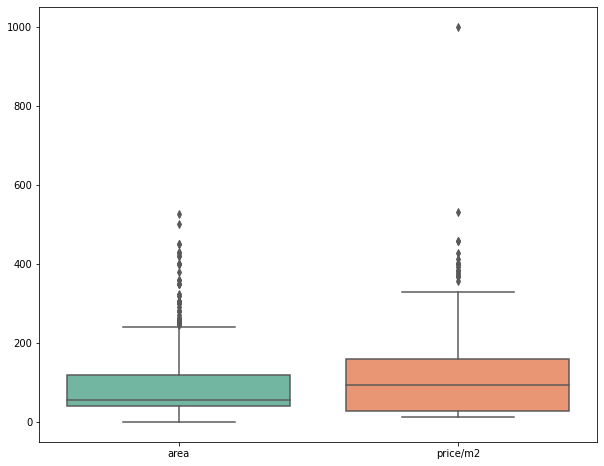

In [104]:
# vẽ biểu đồ boxplot thể dữ giá trị ngoại lai của area và price/m2
plt.figure(figsize=(10, 8))
sns.boxplot(data=df1[['area', 'price/m2']], palette='Set2')

In [105]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
IQR

area          80.000000
price       5650.000000
toilet         1.000000
bedroom        1.000000
floor          0.000000
lat            0.009864
long           0.013283
price/m2     129.099462
dtype: float64

#### Thực hiện loại bỏ các dòng dữ liệu ngoại lai

In [106]:
df2 = df1[~((df1[['area','price/m2']] < (Q1 - 1.5 * IQR)) | (df1[['area','price/m2']] > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Admin\AppData\Local\Temp/ipykernel_19744/2842209507.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df1[~((df1[['area','price/m2']] < (Q1 - 1.5 * IQR)) | (df1[['area','price/m2']] > (Q3 + 1.5 * IQR))).any(axis=1)]
C:\Users\Admin\AppData\Local\Temp/ipykernel_19744/2842209507.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df1[~((df1[['area','price/m2']] < (Q1 - 1.5 * IQR)) | (df1[['area','price/m2']] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [107]:
df2.shape

(633, 19)

<AxesSubplot:>

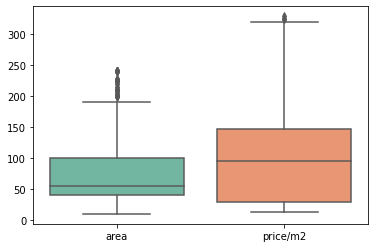

In [108]:
sns.boxplot(data=df2[['area', 'price/m2']], palette='Set2')

#### Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling, Robust scaling, và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa

In [109]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [110]:
df2.isna().sum()

title                 0
address               0
area                  1
price                 0
postDate              0
land_certificate      0
house_direction       0
balcony_direction     0
toilet                0
bedroom               0
floor                 0
type_of_land          0
street_name          90
ward_name            91
district_name         0
city_name             0
lat                   0
long                  0
price/m2              1
dtype: int64

In [111]:
df2.dropna(subset=['price/m2'], inplace=True)
df2.isna().sum()

C:\Users\Admin\AppData\Local\Temp/ipykernel_19744/3356408160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['price/m2'], inplace=True)


title                 0
address               0
area                  0
price                 0
postDate              0
land_certificate      0
house_direction       0
balcony_direction     0
toilet                0
bedroom               0
floor                 0
type_of_land          0
street_name          90
ward_name            91
district_name         0
city_name             0
lat                   0
long                  0
price/m2              0
dtype: int64

<AxesSubplot:xlabel='price/m2', ylabel='Density'>

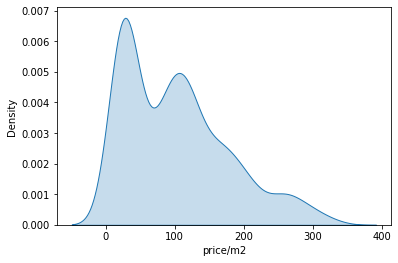

In [112]:
sns.kdeplot(df2['price/m2'], shade=True)

d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price/m2'>

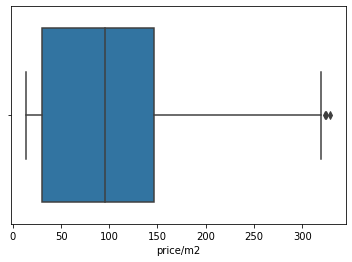

In [113]:
sns.boxplot(df2['price/m2'])

##### Chuẩn hoá z- score scaling

In [114]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler
Z_score = s_scaler.fit_transform(df2['price/m2'].values.reshape(-1, 1))

In [115]:
df2['Z_score'] = Z_score
df2['Z_score']

C:\Users\Admin\AppData\Local\Temp/ipykernel_19744/3761087625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Z_score'] = Z_score


0      2.540669
2     -0.379746
3      0.995324
7      0.122035
8     -0.047484
         ...   
989    0.003969
990   -1.064535
991   -1.054540
994    0.154664
998   -0.753270
Name: Z_score, Length: 632, dtype: float64

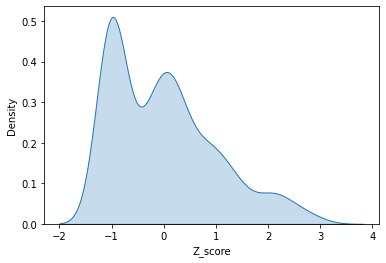

In [116]:
sns.kdeplot(df2['Z_score'], shade=True);

##### Chuẩn hoá dữ liệu với RobustScaler

In [117]:
s_scaler = RobustScaler()
Robust_Scaler = s_scaler.fit_transform(df2['price/m2'].values.reshape(-1, 1))
df2['Robust_Scaler'] = Robust_Scaler
df2['Robust_Scaler']

C:\Users\Admin\AppData\Local\Temp/ipykernel_19744/2474722309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Robust_Scaler'] = Robust_Scaler


0      1.709715
2     -0.184268
3      0.707509
7      0.141152
8      0.031214
         ...   
989    0.064583
990   -0.628376
991   -0.621895
994    0.162313
998   -0.426511
Name: Robust_Scaler, Length: 632, dtype: float64

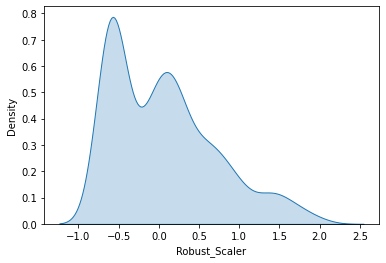

In [118]:
sns.kdeplot(df2['Robust_Scaler'], shade=True);

##### Chuẩn hoá dữ liệu với MinmaxScaler

In [119]:
s_scaler = MinMaxScaler()
MinMax_Scaler = s_scaler.fit_transform(df2['price/m2'].values.reshape(-1, 1))
df2['MinMax_Scaler'] = MinMax_Scaler
df2['MinMax_Scaler']

C:\Users\Admin\AppData\Local\Temp/ipykernel_19744/3001519566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['MinMax_Scaler'] = MinMax_Scaler


0      0.888709
2      0.190433
3      0.519214
7      0.310409
8      0.269877
         ...   
989    0.282180
990    0.026699
991    0.029088
994    0.318211
998    0.101123
Name: MinMax_Scaler, Length: 632, dtype: float64

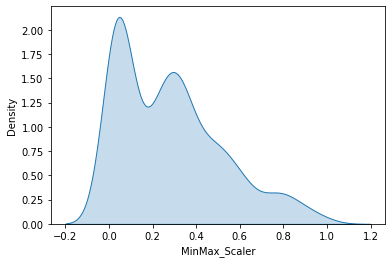

In [120]:
sns.kdeplot(df2['MinMax_Scaler'], shade=True);

In [121]:
df2[['Z_score','Robust_Scaler','MinMax_Scaler']]

,Z_score,Robust_Scaler,MinMax_Scaler
0,2.540669,1.709715,0.888709
2,-0.379746,-0.184268,0.190433
3,0.995324,0.707509,0.519214
7,0.122035,0.141152,0.310409
8,-0.047484,0.031214,0.269877
...,...,...,...
989,0.003969,0.064583,0.282180
990,-1.064535,-0.628376,0.026699
991,-1.054540,-0.621895,0.029088
994,0.154664,0.162313,0.318211


#### Nhận xét : Hình dạng biểu đồ và phân bố của thuộc tính price/m2 trước và sau khi chuẩn hoá không thay đổi